In [135]:
# !pip install wikipedia

In [136]:
import wikipedia
# import wikipediaapi 
import datetime
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn import model_selection
import nltk
from nltk import tokenize
from nltk import word_tokenize, pos_tag
import string
from keras.preprocessing.text import Tokenizer
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [137]:
classes = ['sport', 'economy', 'politics', 'health', 'tourism', 
           'entertainment', 'culture', 'music', 'education', 
           'real estate', 'nutrition', 'science', 'history', 'technology'
          ]

In [138]:
def generate_data(classes, n):
    data = [];
    for i in classes:
#         topics = wikipedia.search(i, results = n)
#         for j in topics:
#         print(classes)
#         print("Class: ", i)
        for j in list(wikipedia.search(i,results = n)):
            wiki_wiki = wikipediaapi.Wikipedia('en')
            page_py = wiki_wiki.page(j)
            if(page_py.exists()):
#                 print("Class: ", i)
#                 print("Title: ", j)
#                     print("Section: ", page_py.sections[0].title)
#                     print("Text: ", page_py.text)
                for k in page_py.categories:
                    if i in k.lower(): 
#                         print("Class: ", i)
                        data.append((i, page_py.summary))
                        break
            else:
                continue
    return data

In [139]:
# data = generate_data(classes, 10)

In [140]:
# for i in classes:
#     c = 0
#     for j in range(0, len(data)):
#         if(data[j][0] == i):
#             c = c + 1
#     print("%s %d" %(i, c))

In [141]:
def create_data_csv_file(name, data):
    name = name + '.csv'
#         '_' + str(datetime.datetime.now()).replace(' ', '_').replace('.', '-').replace(':', '-') + 
#         '.csv'
    sep = '<>'
    cols = 'class' + sep + 'text\n'
    with open(name, 'w+', encoding='utf-8') as file:
        file.write(cols)
#         YELLOW,SMALL,STRETCH,ADULT,T
        for i in range(0, len(data)):
            line = data[i][0] + sep + data[i][1].replace('\n', ' ')

            file.write(line)
            file.write('\n')
    file.close()
            
#     print(text)

In [142]:
# create_data_csv_file('data_10', data)

In [143]:
df = pd.read_csv('data_300.csv', sep = '<>')
df

<ipython-input-143-a286f6c283a2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data_300.csv', sep = '<>')


,class,text
0,sport,Sport pertains to any form of competitive phys...
1,sport,Sport was an American sports magazine. Launche...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп..."
3,sport,Athletics is a group of sporting events that i...
4,sport,Squash is a racket and ball sport played by tw...
...,...,...
3907,technology,Queensland University of Technology (QUT) is a...
3908,technology,Technology education is the study of technolog...
3909,technology,"In business theory, disruptive innovation is i..."
3910,technology,Software Technology Parks of India (STPI) is a...


In [144]:
df['class'].value_counts()

music            431
history          399
sport            393
education        363
culture          333
health           281
politics         274
economy          266
tourism          250
science          240
technology       200
entertainment    194
real estate      177
nutrition        111
Name: class, dtype: int64

In [145]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Palja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
dict_class_index = {
    class_name: i for i, class_name in enumerate(df['class'].unique())
}

df['class num'] = df['class'].map(dict_class_index)

In [147]:
df

,class,text,class num
0,sport,Sport pertains to any form of competitive phys...,0
1,sport,Sport was an American sports magazine. Launche...,0
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0
3,sport,Athletics is a group of sporting events that i...,0
4,sport,Squash is a racket and ball sport played by tw...,0
...,...,...,...
3907,technology,Queensland University of Technology (QUT) is a...,13
3908,technology,Technology education is the study of technolog...,13
3909,technology,"In business theory, disruptive innovation is i...",13
3910,technology,Software Technology Parks of India (STPI) is a...,13


In [148]:
dict_class_index

{'sport': 0,
 'economy': 1,
 'politics': 2,
 'health': 3,
 'tourism': 4,
 'entertainment': 5,
 'culture': 6,
 'music': 7,
 'education': 8,
 'real estate': 9,
 'nutrition': 10,
 'science': 11,
 'history': 12,
 'technology': 13}

In [149]:
!pip install advertools

In [150]:
import advertools as adv
stop_words = sorted(adv.stopwords['english'])
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon

In [151]:
def clear_text(text):
    new_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])).str.lower()
    new_text = new_text.replace(r'[^\w\s]+', '', regex=True)
    return new_text

In [152]:
new_text = clear_text(df['text'])

In [153]:
df['clear text'] = new_text
df

,class,text,class num,clear text
0,sport,Sport pertains to any form of competitive phys...,0,sport pertains form competitive physical activ...
1,sport,Sport was an American sports magazine. Launche...,0,sport american sports magazine launched septem...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0,sport sport sport russian спорт спорт спорт 19...
3,sport,Athletics is a group of sporting events that i...,0,athletics group sporting events involves compe...
4,sport,Squash is a racket and ball sport played by tw...,0,squash racket ball sport played players fourwa...
...,...,...,...,...
3907,technology,Queensland University of Technology (QUT) is a...,13,queensland university technology qut public re...
3908,technology,Technology education is the study of technolog...,13,technology education study technology students...
3909,technology,"In business theory, disruptive innovation is i...",13,in business theory disruptive innovation innov...
3910,technology,Software Technology Parks of India (STPI) is a...,13,software technology parks india stpi premier s...


In [154]:
newest_text = []
for i in range(0, len(df)):
    newest_text.append(word_tokenize(df['clear text'][i]))

In [155]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Palja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [156]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Palja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
def my_lemmitezer(text):
    return pos_tag(word_tokenize(text))

In [158]:
tokenized_lemmitzed_text = []
for i in range(0, len(df)):
    tokenized_lemmitzed_text.append(my_lemmitezer(df['clear text'][i]))

In [159]:
df['tokenized lemmitzed text'] = tokenized_lemmitzed_text

In [160]:
stemmer = nltk.stem.PorterStemmer()

In [161]:
def my_stemmer(text):
    tokenized_stemmed_text = []
    tokens = word_tokenize(text)
    for token in tokens:
        tokenized_stemmed_text.append(stemmer.stem(token))
    return tokenized_stemmed_text

In [162]:
tokenized_stemmed_text = []
for i in range(0, len(df)):
    tokenized_stemmed_text.append(my_stemmer(df['clear text'][i]))

In [163]:
df['tokenized stemmed text'] = tokenized_stemmed_text
# df['tokenized stemmed text'] = df['tokenized stemmed text'].str.join(' ')

In [164]:
x = df['clear text']
x

0       sport pertains form competitive physical activ...
1       sport american sports magazine launched septem...
2       sport sport sport russian спорт спорт спорт 19...
3       athletics group sporting events involves compe...
4       squash racket ball sport played players fourwa...
                              ...                        
3907    queensland university technology qut public re...
3908    technology education study technology students...
3909    in business theory disruptive innovation innov...
3910    software technology parks india stpi premier s...
3911    the european institute innovation technology e...
Name: clear text, Length: 3912, dtype: object

In [165]:
y = df['class num']
y

0        0
1        0
2        0
3        0
4        0
        ..
3907    13
3908    13
3909    13
3910    13
3911    13
Name: class num, Length: 3912, dtype: int64

In [166]:
x_tr, x_ft, y_tr, y_ft = model_selection.train_test_split(x, y, test_size=0.2, stratify=y)

In [167]:
x_tr

790     the angolan government composed branches gover...
3588    the history norway influenced extraordinary de...
475     sufficiency economy thai เศรษฐกจพอเพยง romaniz...
2423    postgraduate education graduate education nort...
304     adrien rabiotprovost french pronunciation adʁi...
                              ...                        
1650    cedar fair lp formally cedar fair entertainmen...
873     international relations ir international studi...
3760    seagate technology holdings plc american data ...
2583    the system higher education austria distinguis...
2539    education indonesia falls responsibility minis...
Name: clear text, Length: 3129, dtype: object

In [168]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_tr, y_tr, test_size=0.3, stratify=y_tr, random_state=5)

In [169]:
count_vectorizer_t = feature_extraction.text.TfidfVectorizer()

In [170]:
count_vectorizer_t.fit(x_train)

TfidfVectorizer()

In [171]:
x_train_t_tfidf = count_vectorizer_t.transform(x_train)
x_test_t_tfidf = count_vectorizer_t.transform(x_test)

In [172]:
model = svm.LinearSVC(max_iter=100000)

In [173]:
model_t = multiclass.OneVsRestClassifier(model)

In [174]:
model_t.fit(x_train_t_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [175]:
y_test_predicted_t = model_t.predict(x_test_t_tfidf)

In [176]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_t), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,93,0,0,0,1,0,0,0,0,0,0,0,0,0
economy,0,63,0,0,0,0,0,0,0,0,0,0,1,0
politics,0,0,61,1,0,0,1,0,0,0,0,0,3,0
health,0,0,0,64,0,0,0,0,1,0,1,1,0,0
tourism,0,0,0,0,59,0,0,0,0,0,0,0,1,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,1,0,0,1,0,1,71,1,0,0,0,0,5,0
music,0,0,0,0,0,2,1,99,0,0,0,0,1,0
education,1,0,1,0,0,0,1,1,82,0,0,1,0,0
real estate,0,0,0,0,0,1,0,1,0,41,0,0,0,0


In [177]:
print(metrics.classification_report(y_test, y_test_predicted_t))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        94
           1       0.97      0.98      0.98        64
           2       0.94      0.92      0.93        66
           3       0.94      0.96      0.95        67
           4       0.98      0.98      0.98        60
           5       0.90      0.98      0.94        46
           6       0.96      0.89      0.92        80
           7       0.95      0.96      0.96       103
           8       0.93      0.94      0.94        87
           9       1.00      0.95      0.98        43
          10       0.90      1.00      0.95        27
          11       0.87      0.79      0.83        58
          12       0.86      0.88      0.87        96
          13       0.86      0.79      0.83        48

    accuracy                           0.93       939
   macro avg       0.93      0.93      0.93       939
weighted avg       0.93      0.93      0.93       939



In [178]:
metrics.f1_score(y_test, y_test_predicted_t, average='macro')

0.9286393235562881

In [179]:
count_vectorizer_l = feature_extraction.text.TfidfVectorizer(tokenizer=my_lemmitezer)

In [180]:
count_vectorizer_l.fit(x_train)

C:\Users\Palja\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function my_lemmitezer at 0x0000028B1375BD30>)

In [181]:
x_train_l_tfidf = count_vectorizer_l.transform(x_train)
x_test_l_tfidf = count_vectorizer_l.transform(x_test)

In [182]:
model = svm.LinearSVC(max_iter=100000)

In [183]:
model_l = multiclass.OneVsRestClassifier(model)

In [184]:
model_l.fit(x_train_l_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [185]:
y_test_predicted_l = model_l.predict(x_test_l_tfidf)

In [186]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_l), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,93,0,0,0,1,0,0,0,0,0,0,0,0,0
economy,0,63,0,0,0,0,0,0,0,0,0,0,1,0
politics,0,0,61,1,0,0,1,0,0,0,0,0,3,0
health,0,0,0,64,0,0,0,0,1,0,1,1,0,0
tourism,0,0,0,0,59,0,0,0,0,0,0,0,1,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,1,0,0,1,1,1,69,1,0,0,0,0,6,0
music,0,0,0,0,0,2,1,99,0,0,0,0,1,0
education,1,0,1,0,0,0,2,2,79,0,0,1,0,1
real estate,1,0,0,0,0,0,0,1,0,40,0,0,0,1


In [187]:
print(metrics.classification_report(y_test, y_test_predicted_l))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        94
           1       0.98      0.98      0.98        64
           2       0.94      0.92      0.93        66
           3       0.94      0.96      0.95        67
           4       0.97      0.98      0.98        60
           5       0.92      0.98      0.95        46
           6       0.95      0.86      0.90        80
           7       0.94      0.96      0.95       103
           8       0.93      0.91      0.92        87
           9       1.00      0.93      0.96        43
          10       0.87      1.00      0.93        27
          11       0.88      0.78      0.83        58
          12       0.86      0.89      0.87        96
          13       0.82      0.83      0.82        48

    accuracy                           0.93       939
   macro avg       0.92      0.93      0.92       939
weighted avg       0.93      0.93      0.92       939



In [188]:
metrics.f1_score(y_test, y_test_predicted_l, average='macro')

0.9242664350513176

In [189]:
count_vectorizer_s = feature_extraction.text.TfidfVectorizer(tokenizer=my_stemmer)

In [190]:
count_vectorizer_s.fit(x_train)

C:\Users\Palja\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function my_stemmer at 0x0000028B1347E5E0>)

In [191]:
x_train_s_tfidf = count_vectorizer_s.transform(x_train)
x_test_s_tfidf = count_vectorizer_s.transform(x_test)

In [192]:
model = svm.LinearSVC(max_iter=100000)

In [193]:
model_s = multiclass.OneVsRestClassifier(model)

In [194]:
model_s.fit(x_train_s_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [195]:
y_test_predicted_s = model_s.predict(x_test_s_tfidf)

In [196]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_s), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,92,0,0,0,1,0,0,1,0,0,0,0,0,0
economy,0,63,0,0,0,0,0,0,0,0,0,0,1,0
politics,0,0,61,1,0,0,1,0,0,0,0,0,3,0
health,0,0,0,64,0,0,0,0,1,0,1,1,0,0
tourism,0,0,0,0,58,0,1,0,0,0,0,0,1,0
entertainment,1,0,0,0,0,45,0,0,0,0,0,0,0,0
culture,1,0,0,1,0,1,69,0,0,0,0,0,8,0
music,0,0,0,0,0,2,1,99,0,0,0,0,1,0
education,1,0,0,1,0,0,2,1,80,0,0,1,0,1
real estate,0,1,0,0,0,1,0,1,0,40,0,0,0,0


In [197]:
print(metrics.classification_report(y_test, y_test_predicted_s))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        94
           1       0.95      0.98      0.97        64
           2       0.95      0.92      0.94        66
           3       0.93      0.96      0.94        67
           4       0.98      0.97      0.97        60
           5       0.90      0.98      0.94        46
           6       0.92      0.86      0.89        80
           7       0.96      0.96      0.96       103
           8       0.92      0.92      0.92        87
           9       1.00      0.93      0.96        43
          10       0.90      0.96      0.93        27
          11       0.88      0.74      0.80        58
          12       0.83      0.86      0.85        96
          13       0.84      0.85      0.85        48

    accuracy                           0.92       939
   macro avg       0.92      0.92      0.92       939
weighted avg       0.92      0.92      0.92       939



In [198]:
metrics.f1_score(y_test, y_test_predicted_s, average='macro')

0.9195727998025831

In [199]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [200]:
file = open('glove.6B.100d.txt', 'r', encoding='utf-8')
lines  = file.readlines()
file.close()

In [201]:
word_embeddings = {}

for line in lines:
    strs = line.split()
    word = strs[0]
    coefs = np.array(strs[1:], dtype='float32')
    
    word_embeddings[word] = coefs

In [202]:
x_train

3349    the history mathematics deals origin discoveri...
1026    health care united states provided distinct or...
2627    international education refers dynamic concept...
685     the following outline provided overview topica...
2827    a real estate trend consistent pattern change ...
                              ...                        
1900    the culture cuba complex mixture different con...
754     the politics virginia followed major historica...
2205    psychedelic music sometimes called psychedelia...
767     the politics afghanistan dominated taliban isl...
961     oscar health inc american health insurance com...
Name: clear text, Length: 2190, dtype: object

In [203]:
dimension = 100
# voc_size = 15000 #voditi racuna ovo mora da se povecava kada se poveca broj tekstova
voc_size = len(word_embeddings)
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [204]:
# num_of_words = min(voc_size, len(word_index))
num_of_words = 400000

In [205]:
coef_matrix = np.zeros((num_of_words, dimension))

for word, ord_num in word_index.items():
    if ord_num >= num_of_words:
        continue
    
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        coef_matrix[ord_num] = embedding_vector

In [206]:
# max_len = max([len(i) for i in x_train])
max_len = 100

In [207]:
# data_len = len(x_train)
# x_train = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
# x_train_glove = sequence.pad_sequences([x for x in x_train], maxlen=max_len, dtype='float16')
# x_train_glove = x_train_glove.reshape(data_len, max_len * 100).astype('float16')

In [208]:
x_train_glove = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_train_glove = [np.mean(np.asarray(x), axis=0) for x in x_train_glove]

In [209]:
x_train_glove

[array([-4.63286854e-02,  2.10235966e-01,  1.45574559e-01,  1.62218354e-01,
         1.29640875e-01, -1.49806715e-01, -9.02475864e-02, -1.05450202e-01,
        -8.25672993e-02,  1.29388736e-01, -1.37054602e-01, -2.83707946e-01,
         1.47874809e-01,  2.44583030e-02,  1.83273735e-02, -1.13443061e-01,
         2.01141848e-01,  2.57502815e-02, -1.82349501e-01,  3.53529367e-03,
        -1.85318872e-02, -4.97980417e-02,  2.02163876e-01,  6.09868932e-02,
        -6.64326106e-02, -2.43075056e-01,  1.29610873e-01, -1.80414140e-01,
        -9.56618065e-02,  1.58380665e-03, -1.35460335e-01,  2.11379332e-01,
        -2.20731352e-01, -1.15179905e-01, -3.48534254e-02,  9.74209372e-02,
         1.48281916e-03,  1.21213226e-01, -1.95365369e-01, -1.23000392e-01,
        -3.78257263e-01, -1.49287048e-01, -3.09779681e-02,  3.53423572e-02,
        -2.34210545e-02, -1.32766947e-01,  2.13483748e-01, -2.49340275e-02,
        -7.84858866e-02, -3.38814715e-01,  3.72508646e-02,  2.61073479e-02,
         5.8

In [210]:
# data_len = len(x_test)
# x_test = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
# x_test_glove = sequence.pad_sequences([x for x in x_test], maxlen=max_len, dtype='float16')
# x_test_glove = x_test_glove.reshape(data_len, max_len * 100).astype('float16')

In [211]:
x_test_glove = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_test_glove = [np.mean(np.asarray(x), axis=0) for x in x_test_glove]

In [212]:
# def convert_to_svm_fromat(text, max_len):
#     text = text.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])

#     x_train_glove = []

#     for i in text:
#         glove = []
#         for j in i:
#             glove.extend(j)
#         if len(i) < max_len:
#             glove.extend(np.zeros((max_len - len(i))*100))
#         x_train_glove.append(glove)
#     return x_train_glove

In [213]:
model = svm.LinearSVC(max_iter=100000)

In [214]:
model_g = multiclass.OneVsRestClassifier(model)

In [215]:
model_g.fit(x_train_glove, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [216]:
y_test_predicted_g = model_g.predict(x_test_glove)

In [217]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_g), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,77,1,1,1,2,1,0,6,3,1,0,0,1,0
economy,0,54,0,0,2,0,0,0,3,0,0,1,2,2
politics,6,1,41,1,4,3,2,1,2,0,0,0,5,0
health,0,0,1,59,0,0,1,1,0,0,0,0,1,4
tourism,1,0,1,0,48,1,2,1,1,0,0,0,5,0
entertainment,1,0,0,1,1,34,4,2,0,1,0,0,1,1
culture,2,2,1,0,3,0,58,3,0,0,1,2,8,0
music,3,1,0,1,2,2,3,88,1,0,0,1,0,1
education,3,0,2,1,0,0,1,2,73,0,0,1,2,2
real estate,2,2,2,0,0,0,0,1,0,34,1,1,0,0


In [218]:
print(metrics.classification_report(y_test, y_test_predicted_g))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        94
           1       0.75      0.84      0.79        64
           2       0.71      0.62      0.66        66
           3       0.88      0.88      0.88        67
           4       0.73      0.80      0.76        60
           5       0.76      0.74      0.75        46
           6       0.79      0.72      0.76        80
           7       0.79      0.85      0.82       103
           8       0.79      0.84      0.82        87
           9       0.89      0.79      0.84        43
          10       0.91      0.74      0.82        27
          11       0.81      0.59      0.68        58
          12       0.60      0.60      0.60        96
          13       0.69      0.71      0.70        48

    accuracy                           0.76       939
   macro avg       0.77      0.75      0.76       939
weighted avg       0.76      0.76      0.76       939



In [219]:
metrics.f1_score(y_test, y_test_predicted_g, average='macro')

0.7603436663273371

In [220]:
maxlen = max([x_train_t_tfidf[i].data.shape[0] for i in range(x_train_t_tfidf.shape[0])])
maxlen = 500

In [221]:
x_train_t_tfidf = sequence.pad_sequences([x.data for x in x_train_t_tfidf], maxlen=maxlen, dtype='float16')
x_test_t_tfidf = sequence.pad_sequences([x.data for x in x_test_t_tfidf], maxlen=maxlen, dtype='float16')

In [222]:
vocabulary_size = len(count_vectorizer_t.vocabulary_)
vocabulary_size

31254

In [223]:
y_train = utils.to_categorical(y_train, 14)
y_test = utils.to_categorical(y_test, 14)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [224]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(100, 2, activation='relu'), 
                    MaxPool1D(pool_size=14),
                    Conv1D(48, 14, activation='relu'), 
                    # MaxPool1D(pool_size=14),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dense(14, activation='softmax')
                   ]) 

In [225]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          4000512   
                                                                 
 conv1d_5 (Conv1D)           (None, 499, 100)          25700     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 35, 100)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 22, 48)            67248     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_4 (Flatten)         (None, 48)               

In [226]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [227]:
history = model.fit(x_train_t_tfidf, y_train, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30
7/7 [==============================] - 4s 351ms/step - loss: 0.4876 - accuracy: 0.0987 - val_loss: 0.3561 - val_accuracy: 0.0936
Epoch 2/30
7/7 [==============================] - 2s 308ms/step - loss: 0.2944 - accuracy: 0.1130 - val_loss: 0.2723 - val_accuracy: 0.1096
Epoch 3/30
7/7 [==============================] - 2s 300ms/step - loss: 0.2671 - accuracy: 0.1107 - val_loss: 0.2556 - val_accuracy: 0.1050
Epoch 4/30
7/7 [==============================] - 2s 304ms/step - loss: 0.2592 - accuracy: 0.0993 - val_loss: 0.2539 - val_accuracy: 0.1050
Epoch 5/30
7/7 [==============================] - 2s 293ms/step - loss: 0.2559 - accuracy: 0.0970 - val_loss: 0.2535 - val_accuracy: 0.1096
Epoch 6/30
7/7 [==============================] - 2s 301ms/step - loss: 0.2548 - accuracy: 0.1107 - val_loss: 0.2534 - val_accuracy: 0.1096
Epoch 7/30
7/7 [==============================] - 2s 289ms/step - loss: 0.2542 - accuracy: 0.0970 - val_loss: 0.2537 - val_accuracy: 0.1096
Epoch 8/30
7/7 [====

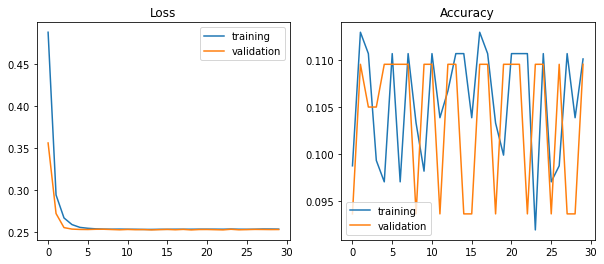

In [228]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [229]:
train_scores = model.evaluate(x_train_t_tfidf, y_train)

69/69 [==============================] - 1s 10ms/step - loss: 0.2535 - accuracy: 0.1105


In [230]:
train_scores

[0.2534831762313843, 0.11050228029489517]

In [231]:
test_scores = model.evaluate(x_test_t_tfidf, y_test)

30/30 [==============================] - 0s 10ms/step - loss: 0.2536 - accuracy: 0.1097


In [232]:
test_scores

[0.2535720467567444, 0.10969115793704987]

In [233]:
maxlen = max([x_train_l_tfidf[i].data.shape[0] for i in range(x_train_l_tfidf.shape[0])])
maxlen = 500

In [234]:
x_train_l_tfidf = sequence.pad_sequences([x.data for x in x_train_l_tfidf], maxlen=maxlen, dtype='float16')
x_test_l_tfidf = sequence.pad_sequences([x.data for x in x_test_l_tfidf], maxlen=maxlen, dtype='float16')

In [235]:
vocabulary_size = len(count_vectorizer_l.vocabulary_)

In [236]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [237]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          5508480   
                                                                 
 conv1d_7 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_5 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_5 (Flatten)         (None, 48)                0         
                                                                 
 dense_7 (Dense)             (None, 14)               

In [238]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [239]:
history = model.fit(x_train_l_tfidf, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 5s 311ms/step - loss: 0.4072 - accuracy: 0.0565 - val_loss: 0.2635 - val_accuracy: 0.0502
Epoch 2/30
14/14 [==============================] - 4s 314ms/step - loss: 0.2582 - accuracy: 0.0736 - val_loss: 0.2553 - val_accuracy: 0.1096
Epoch 3/30
14/14 [==============================] - 5s 331ms/step - loss: 0.2546 - accuracy: 0.1107 - val_loss: 0.2543 - val_accuracy: 0.1096
Epoch 4/30
14/14 [==============================] - 4s 320ms/step - loss: 0.2538 - accuracy: 0.1067 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 5/30
14/14 [==============================] - 4s 307ms/step - loss: 0.2534 - accuracy: 0.1107 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 6/30
14/14 [==============================] - 4s 301ms/step - loss: 0.2534 - accuracy: 0.1010 - val_loss: 0.2532 - val_accuracy: 0.1096
Epoch 7/30
14/14 [==============================] - 4s 304ms/step - loss: 0.2534 - accuracy: 0.1039 - val_loss: 0.2529 - val_accuracy: 0.1096
Epoch 

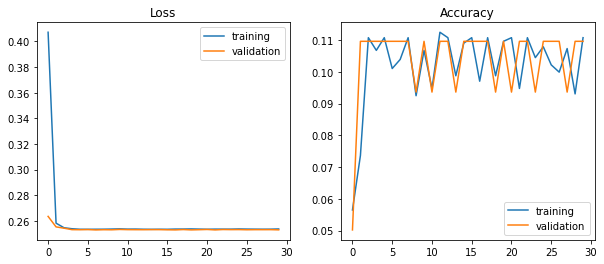

In [240]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [241]:
train_scores = model.evaluate(x_train_l_tfidf, y_train)

69/69 [==============================] - 1s 11ms/step - loss: 0.2532 - accuracy: 0.1105


In [242]:
train_scores

[0.2532026767730713, 0.11050228029489517]

In [243]:
test_scores = model.evaluate(x_test_l_tfidf, y_test)

30/30 [==============================] - 0s 11ms/step - loss: 0.2533 - accuracy: 0.1097


In [244]:
test_scores

[0.2532729506492615, 0.10969115793704987]

In [245]:
maxlen = max([x_train_s_tfidf[i].data.shape[0] for i in range(x_train_s_tfidf.shape[0])])
maxlen  = 500

In [246]:
x_train_s_tfidf = sequence.pad_sequences([x.data for x in x_train_s_tfidf], maxlen=maxlen, dtype='float16')
x_test_s_tfidf = sequence.pad_sequences([x.data for x in x_test_s_tfidf], maxlen=maxlen, dtype='float16')

In [247]:
vocabulary_size = len(count_vectorizer_s.vocabulary_)

In [248]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [249]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          3037184   
                                                                 
 conv1d_8 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_6 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_6 (Flatten)         (None, 48)                0         
                                                                 
 dense_8 (Dense)             (None, 14)               

In [250]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [251]:
history = model.fit(x_train_s_tfidf, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 5s 294ms/step - loss: 0.3555 - accuracy: 0.0691 - val_loss: 0.2565 - val_accuracy: 0.1096
Epoch 2/30
14/14 [==============================] - 4s 282ms/step - loss: 0.2583 - accuracy: 0.1107 - val_loss: 0.2573 - val_accuracy: 0.1096
Epoch 3/30
14/14 [==============================] - 4s 285ms/step - loss: 0.2557 - accuracy: 0.1107 - val_loss: 0.2543 - val_accuracy: 0.1096
Epoch 4/30
14/14 [==============================] - 4s 282ms/step - loss: 0.2538 - accuracy: 0.1067 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 5/30
14/14 [==============================] - 4s 278ms/step - loss: 0.2535 - accuracy: 0.0982 - val_loss: 0.2530 - val_accuracy: 0.1096
Epoch 6/30
14/14 [==============================] - 4s 287ms/step - loss: 0.2534 - accuracy: 0.1107 - val_loss: 0.2532 - val_accuracy: 0.1096
Epoch 7/30
14/14 [==============================] - 4s 285ms/step - loss: 0.2536 - accuracy: 0.0913 - val_loss: 0.2531 - val_accuracy: 0.1096
Epoch 

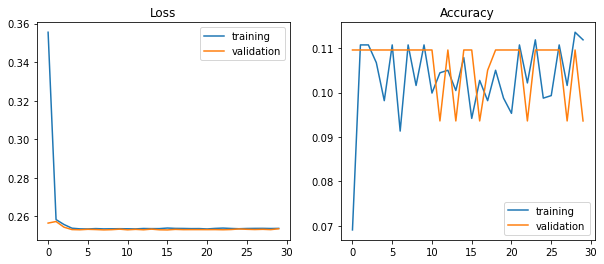

In [252]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [253]:
train_scores = model.evaluate(x_train_s_tfidf, y_train)

69/69 [==============================] - 1s 12ms/step - loss: 0.2534 - accuracy: 0.1018


In [254]:
train_scores

[0.2534312307834625, 0.10182648152112961]

In [255]:
test_scores = model.evaluate(x_test_s_tfidf, y_test)

30/30 [==============================] - 0s 11ms/step - loss: 0.2535 - accuracy: 0.1022


In [256]:
test_scores

[0.2534971535205841, 0.10223641991615295]

In [257]:
x_train = x_train.apply(lambda x: [word_index[word] for word in x.split(' ') if word in word_index])
x_test = x_test.apply(lambda x: [word_index[word] for word in x.split(' ') if word in word_index])

In [258]:
x_train

3349    [1, 14, 476, 1759, 1181, 2346, 476, 1389, 447,...
1026    [5, 70, 9, 11, 517, 549, 420, 365, 275, 215, 1...
2627    [36, 3, 375, 3510, 455, 885, 8314, 335, 34, 44...
685     [1, 115, 3511, 517, 3786, 4097, 2062, 89, 26, ...
2827    [22, 48, 59, 3299, 3787, 2477, 565, 117, 1981,...
                              ...                        
1900    [1, 7, 1029, 676, 6847, 81, 31285, 791, 986, 1...
754     [1, 89, 3495, 301, 47, 230, 134, 2597, 585, 10...
2205    [3063, 2, 2658, 91, 8300, 474, 272, 67, 2, 570...
767     [1, 89, 1113, 635, 6975, 708, 335, 3851, 712, ...
961     [5865, 5, 472, 45, 5, 365, 28, 103, 220, 8391,...
Name: clear text, Length: 2190, dtype: object

In [259]:
maxlen = 500
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [260]:
model = Sequential([Embedding(voc_size, dimension, input_length=maxlen, trainable=False, weights=[coef_matrix]), 
                    Conv1D(48, 14, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [261]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 100)          40000000  
                                                                 
 conv1d_9 (Conv1D)           (None, 487, 48)           67248     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_7 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_7 (Flatten)         (None, 48)                0         
                                                                 
 dense_9 (Dense)             (None, 14)               

In [262]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [263]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 [==============================] - 3s 196ms/step - loss: 0.4066 - accuracy: 0.0993 - val_loss: 0.2618 - val_accuracy: 0.1073
Epoch 2/30
14/14 [==============================] - 3s 186ms/step - loss: 0.2521 - accuracy: 0.1050 - val_loss: 0.2482 - val_accuracy: 0.0936
Epoch 3/30
14/14 [==============================] - 3s 183ms/step - loss: 0.2459 - accuracy: 0.2032 - val_loss: 0.2413 - val_accuracy: 0.2648
Epoch 4/30
14/14 [==============================] - 3s 188ms/step - loss: 0.2381 - accuracy: 0.2968 - val_loss: 0.2352 - val_accuracy: 0.2785
Epoch 5/30
14/14 [==============================] - 3s 180ms/step - loss: 0.2309 - accuracy: 0.3185 - val_loss: 0.2280 - val_accuracy: 0.3333
Epoch 6/30
14/14 [==============================] - 3s 189ms/step - loss: 0.2219 - accuracy: 0.4195 - val_loss: 0.2178 - val_accuracy: 0.5046
Epoch 7/30
14/14 [==============================] - 3s 179ms/step - loss: 0.2107 - accuracy: 0.6621 - val_loss: 0.2078 - val_accuracy: 0.6986
Epoch 

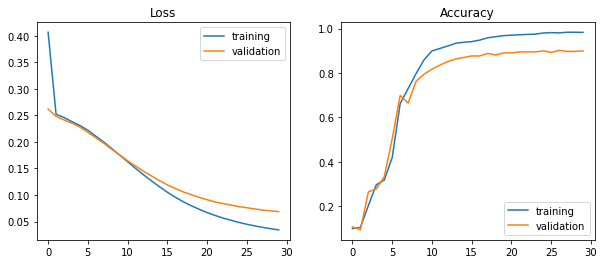

In [264]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [265]:
train_scores = model.evaluate(x_train, y_train)

69/69 [==============================] - 1s 11ms/step - loss: 0.0399 - accuracy: 0.9671


In [266]:
train_scores

[0.03993278741836548, 0.96712327003479]

In [267]:
test_scores = model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 12ms/step - loss: 0.0658 - accuracy: 0.8914


In [268]:
test_scores

[0.06580467522144318, 0.8913738131523132]